In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

import pickle

In [2]:
path = 'Data/im.db/im.db'
conn = sqlite3.connect(path)
cursor = conn.cursor()

In [3]:
pd.read_sql('''SELECT * 
FROM movie_basics''', conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
imdb_data = pd.read_sql('''SELECT * 
FROM movie_ratings
JOIN movie_basics
USING(movie_id)
JOIN principals
USING(movie_id)
JOIN persons
USING(person_id)
''', conn)

In [5]:
imdb_data['primary_title'] = imdb_data['primary_title'].str.upper()
imdb_data['primary_title'] = imdb_data['primary_title'].str.strip()
imdb_data['primary_title'] = imdb_data['primary_title'].str.replace(' ', '-')

In [6]:
path = 'Data/tn.movie_budgets.csv.gz'
conn2 = sqlite3.connect(path)
cursor2 = conn.cursor()

In [7]:
file_path1 = 'Data/tn.movie_budgets.csv.gz'

movie_budget_data = pd.read_csv(file_path1, compression = 'gzip')
movie_budget_data.sort_values(by ='worldwide_gross', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"
5062,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886"
883,84,"Apr 2, 2004",Hellboy,"$60,000,000","$59,623,958","$99,823,958"
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000"
...,...,...,...,...,...,...
5488,89,"Dec 31, 2014",The Sound and the Shadow,"$500,000",$0,$0
5487,88,"Dec 1, 2015",Brooklyn Bizarre,"$500,000",$0,$0
5486,87,"Aug 11, 2015",Alleluia! The Devil's Carnival,"$500,000",$0,$0
5485,86,"Jun 23, 2015",Crossroads,"$500,000",$0,$0


In [8]:
pd.to_datetime(movie_budget_data['release_date'])
movie_budget_data['release_date'].sort_values(ascending=False)

3584    Sep 9, 2016
3129    Sep 9, 2016
3712    Sep 9, 2016
3287    Sep 9, 2016
849     Sep 9, 2016
           ...     
1408    Apr 1, 2005
5769    Apr 1, 1996
2260    Apr 1, 1988
5520    Apr 1, 1986
5559    Apr 1, 1975
Name: release_date, Length: 5782, dtype: object

In [9]:
movie_budget_data.rename(columns={'movie': 'title'}, inplace=True)
movie_budget_data['title'] = movie_budget_data['title'].str.upper()
movie_budget_data['title'] = movie_budget_data['title'].str.strip()
movie_budget_data['title'] = movie_budget_data['title'].str.replace(' ', '-')

movie_budget_data['production_budget'] = movie_budget_data['production_budget'].str.replace('$', '')
movie_budget_data['production_budget'] = movie_budget_data['production_budget'].str.replace(',', '')
movie_budget_data['production_budget'] = movie_budget_data['production_budget'].astype(int)

movie_budget_data['domestic_gross'] = movie_budget_data['domestic_gross'].str.replace('$', '')
movie_budget_data['domestic_gross'] = movie_budget_data['domestic_gross'].str.replace(',', '')
movie_budget_data['domestic_gross'] = movie_budget_data['domestic_gross'].astype(int)

movie_budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   object
dtypes: int32(2), int64(1), object(3)
memory usage: 226.0+ KB


In [10]:
file_path2 = 'Data/bom.movie_gross.csv.gz'

movie_gross_data = pd.read_csv(file_path2, compression = 'gzip')
movie_gross_data['title'] = movie_gross_data['title'].str.upper()
movie_gross_data['title'] = movie_gross_data['title'].str.strip()
movie_gross_data['title'] = movie_gross_data['title'].str.replace(' ', '-')

movie_gross_data = movie_gross_data.dropna(subset=['domestic_gross', 'year', 'studio'])
movie_gross_data['foreign_gross'].fillna(0, inplace=True)

In [11]:
financial_movie_data = pd.merge(movie_budget_data, movie_gross_data, on='title', how='inner')
financial_movie_data

,id,release_date,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,"$1,045,663,875",BV,241100000.0,804600000,2011
1,4,"May 1, 2015",AVENGERS:-AGE-OF-ULTRON,330600000,459005868,"$1,403,013,963",BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",AVENGERS:-INFINITY-WAR,300000000,678815482,"$2,048,134,200",BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",JUSTICE-LEAGUE,300000000,229024295,"$655,945,209",WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",SPECTRE,300000000,200074175,"$879,620,923",Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...
1280,68,"Apr 27, 2012",SOUND-OF-MY-VOICE,135000,408015,"$429,448",FoxS,408000.0,0,2012
1281,73,"Jun 15, 2012",YOUR-SISTER'S-SISTER,120000,1597486,"$3,090,593",IFC,1600000.0,0,2012
1282,80,"Jul 10, 2015",THE-GALLOWS,100000,22764410,"$41,656,474",WB (NL),22800000.0,20200000,2015
1283,86,"Jul 7, 2017",A-GHOST-STORY,100000,1594798,"$2,769,782",A24,1600000.0,0,2017


In [12]:
file_path3 = 'Data/tmdb.movies.csv.gz'

tmdb_movie_data = pd.read_csv(file_path3, compression = 'gzip')
tmdb_movie_data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [13]:
tmdb_movie_data['title'] = tmdb_movie_data['title'].str.upper()
tmdb_movie_data['title'] = tmdb_movie_data['title'].str.strip()
tmdb_movie_data['title'] = tmdb_movie_data['title'].str.replace(' ', '-')

In [14]:
finance_plus_vote_data = pd.merge(financial_movie_data, tmdb_movie_data, on='title', how='inner')
finance_plus_vote_data

,id_x,release_date_x,title,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,foreign_gross,year,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,2,"May 20, 2011",PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,"$1,045,663,875",BV,241100000.0,804600000,2011,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571
1,4,"May 1, 2015",AVENGERS:-AGE-OF-ULTRON,330600000,459005868,"$1,403,013,963",BV,459000000.0,946400000,2015,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457
2,7,"Apr 27, 2018",AVENGERS:-INFINITY-WAR,300000000,678815482,"$2,048,134,200",BV,678800000.0,"1,369.5",2018,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
3,9,"Nov 17, 2017",JUSTICE-LEAGUE,300000000,229024295,"$655,945,209",WB,229000000.0,428900000,2017,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
4,9,"Nov 17, 2017",JUSTICE-LEAGUE,300000000,229024295,"$655,945,209",WB,229000000.0,428900000,2017,23830,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,6.2,7510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,68,"Apr 27, 2012",SOUND-OF-MY-VOICE,135000,408015,"$429,448",FoxS,408000.0,0,2012,2815,"[878, 18, 9648, 53]",86812,en,Sound of My Voice,7.212,2011-01-22,6.4,169
1448,73,"Jun 15, 2012",YOUR-SISTER'S-SISTER,120000,1597486,"$3,090,593",IFC,1600000.0,0,2012,5468,"[18, 35]",84355,en,Your Sister's Sister,7.115,2012-06-14,6.6,192
1449,80,"Jul 10, 2015",THE-GALLOWS,100000,22764410,"$41,656,474",WB (NL),22800000.0,20200000,2015,14362,"[27, 53]",299245,en,The Gallows,9.166,2015-07-10,4.8,591
1450,86,"Jul 7, 2017",A-GHOST-STORY,100000,1594798,"$2,769,782",A24,1600000.0,0,2017,20776,"[18, 14, 10749]",428449,en,A Ghost Story,11.886,2017-07-07,7.0,906


In [15]:
finance_plus_vote_data = finance_plus_vote_data.drop(columns=['id_x', 'release_date_x', 'domestic_gross_y', 'Unnamed: 0', 'id_y'])

finance_plus_vote_data['worldwide_gross'] = finance_plus_vote_data['worldwide_gross'].str.replace('$', '')
finance_plus_vote_data['worldwide_gross'] = finance_plus_vote_data['worldwide_gross'].str.replace(',', '')
finance_plus_vote_data['worldwide_gross'] = finance_plus_vote_data['worldwide_gross'].astype(np.int32)

In [16]:
finance_plus_vote_data.rename(columns={'domestic_gross_x': 'domestic_gross'}, inplace=True)
finance_plus_vote_data.rename(columns={'release_date_y': 'release_date'}, inplace=True)

In [17]:
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].str.split('.').str[0]
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].str.replace(',', '')
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].fillna(0).astype(np.int64)
finance_plus_vote_data['foreign_gross'] = finance_plus_vote_data['foreign_gross'].astype(np.int64)

finance_plus_vote_data['profit_margin'] = finance_plus_vote_data['worldwide_gross'] - finance_plus_vote_data['production_budget']
finance_plus_vote_data['percent_profit'] = finance_plus_vote_data['profit_margin']/(finance_plus_vote_data['worldwide_gross'])*100

In [18]:
finance_plus_vote_data = finance_plus_vote_data[finance_plus_vote_data['original_language'] == 'en']


In [19]:
finance_plus_vote_data['release_date'] = pd.to_datetime(finance_plus_vote_data['release_date'])
finance_plus_vote_data['release_month'] = finance_plus_vote_data['release_date'].dt.month
finance_plus_vote_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1451
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1400 non-null   object        
 1   production_budget  1400 non-null   int32         
 2   domestic_gross     1400 non-null   int32         
 3   worldwide_gross    1400 non-null   int32         
 4   studio             1400 non-null   object        
 5   foreign_gross      1400 non-null   int64         
 6   year               1400 non-null   int64         
 7   genre_ids          1400 non-null   object        
 8   original_language  1400 non-null   object        
 9   original_title     1400 non-null   object        
 10  popularity         1400 non-null   float64       
 11  release_date       1400 non-null   datetime64[ns]
 12  vote_average       1400 non-null   float64       
 13  vote_count         1400 non-null   int64         
 14  profit_m

In [20]:
clean_finance_plus_vote = finance_plus_vote_data[finance_plus_vote_data['percent_profit'] != -np.inf]
clean_finance_plus_vote = clean_finance_plus_vote[clean_finance_plus_vote['percent_profit'] > -500]
clean_finance_plus_vote['profitable'] = np.where(clean_finance_plus_vote['percent_profit']>0, 1, 0)
clean_finance_plus_vote

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,release_month,profitable
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,5,1
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,5,1
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,4,1
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,11,1
4,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,7,1


In [21]:
pos_profit = clean_finance_plus_vote[clean_finance_plus_vote['percent_profit'] > 0]
pos_profit_50 = pos_profit[pos_profit['percent_profit'] > 50]
pos_profit_50

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,release_month,profitable
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,5,1
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,5,1
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,4,1
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,11,1
4,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,7,1


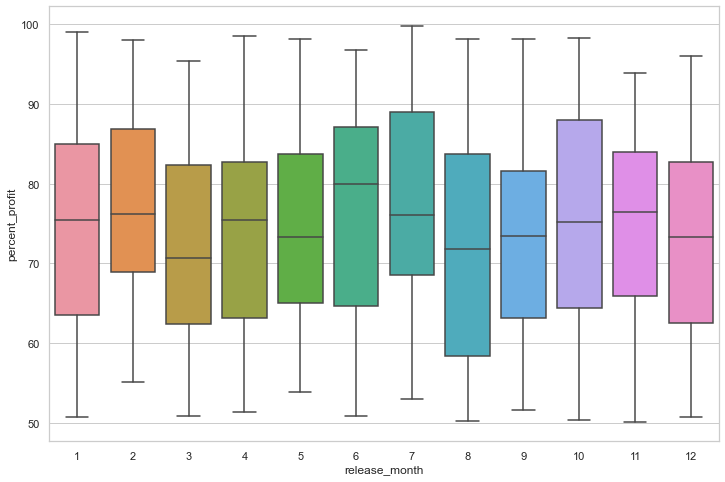

In [22]:
sns.set(style="whitegrid")

# Create the Box plot of percent profit by release month
plt.figure(figsize=(12,8))
sns.boxplot(x="release_month", y="percent_profit", data=pos_profit_50)

# Show the plot
plt.show()


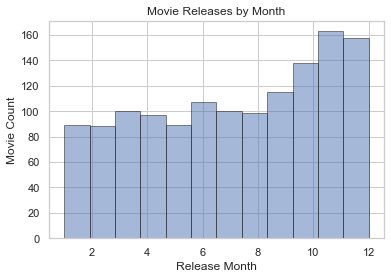

In [24]:
plt.hist(clean_finance_plus_vote['release_month'], bins=12, edgecolor='k', alpha=0.5)  # Histogram of number of releases by month
plt.xlabel('Release Month')
plt.ylabel('Movie Count')
plt.title('Movie Releases by Month')
plt.grid(True)

In [27]:
cleaned_pos_profit_50 = pos_profit_50.drop_duplicates(subset='title')
cleaned_pos_profit_50

,title,production_budget,domestic_gross,worldwide_gross,studio,foreign_gross,year,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count,profit_margin,percent_profit,release_month,profitable
0,PIRATES-OF-THE-CARIBBEAN:-ON-STRANGER-TIDES,410600000,241063875,1045663875,BV,804600000,2011,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,6.4,8571,635063875,60.733080,5,1
1,AVENGERS:-AGE-OF-ULTRON,330600000,459005868,1403013963,BV,946400000,2015,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,1072413963,76.436443,5,1
2,AVENGERS:-INFINITY-WAR,300000000,678815482,2048134200,BV,1369,2018,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,1748134200,85.352522,4,1
3,JUSTICE-LEAGUE,300000000,229024295,655945209,WB,428900000,2017,"[28, 12, 14, 878]",en,Justice League,34.953,2017-11-17,6.2,7510,355945209,54.264473,11,1
5,SPECTRE,300000000,200074175,879620923,Sony,680600000,2015,"[28, 12, 80]",en,Spectre,30.318,2015-11-06,6.4,6719,579620923,65.894399,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,SOUND-OF-MY-VOICE,135000,408015,429448,FoxS,0,2012,"[878, 18, 9648, 53]",en,Sound of My Voice,7.212,2011-01-22,6.4,169,294448,68.564296,1,1
1448,YOUR-SISTER'S-SISTER,120000,1597486,3090593,IFC,0,2012,"[18, 35]",en,Your Sister's Sister,7.115,2012-06-14,6.6,192,2970593,96.117250,6,1
1449,THE-GALLOWS,100000,22764410,41656474,WB (NL),20200000,2015,"[27, 53]",en,The Gallows,9.166,2015-07-10,4.8,591,41556474,99.759941,7,1
1450,A-GHOST-STORY,100000,1594798,2769782,A24,0,2017,"[18, 14, 10749]",en,A Ghost Story,11.886,2017-07-07,7.0,906,2669782,96.389608,7,1


<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

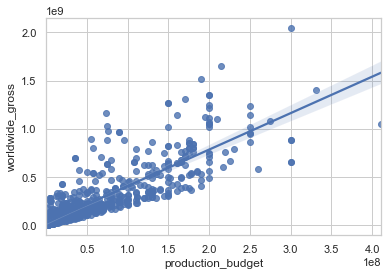

In [32]:
sns.regplot(x=pos_profit_50["production_budget"], y=pos_profit_50["worldwide_gross"])

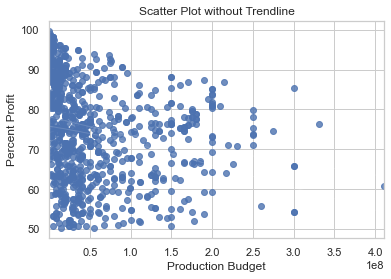

In [33]:
sns.regplot(x=pos_profit_50["production_budget"], y=pos_profit_50["percent_profit"], line_kws={"color": "none"})


plt.xlabel('Production Budget')
plt.ylabel('Percent Profit')
plt.title('Scatter Plot without Trendline')
plt.show()

In [28]:
from pandasql import sqldf 

In [29]:
pysqldf = lambda q: sqldf(q, globals())

In [30]:
query = """
SELECT studio, COUNT(studio) as studio_count, AVG(percent_profit) AS avg_percent_profit, AVG(production_budget) as avg_production_budget
FROM cleaned_pos_profit_50
GROUP BY studio
HAVING COUNT(studio)>1
ORDER BY avg_percent_profit DESC
"""
result = pysqldf(query)
result

,studio,studio_count,avg_percent_profit,avg_production_budget
0,IFC,6,83.912975,8.195000e+06
1,RTWC,3,83.525000,2.000000e+06
2,BH Tilt,4,82.838971,2.250000e+06
3,Magn.,3,82.744600,5.900000e+05
4,FoxS,21,82.710144,1.060048e+07
5,FD,3,80.349288,2.408333e+07
6,RAtt.,10,77.811673,5.905000e+06
7,A24,12,77.571408,6.258333e+06
8,Uni.,88,77.326969,5.158182e+07
9,WB (NL),30,77.320510,5.745333e+07


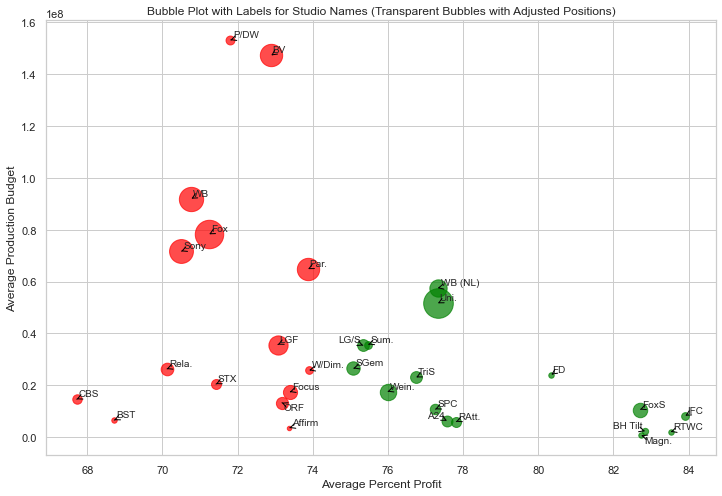

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text  

data = {
    'studio': ['IFC', 'RTWC', 'BH Tilt', 'Magn.', 'FoxS', 'FD', 'RAtt.', 'A24', 'Uni.', 'WB (NL)', 'SPC', 'TriS', 'Wein.', 'Sum.', 'LG/S', 'SGem', 'W/Dim.', 'Par.', 'Focus', 'Affirm', 'ORF', 'LGF', 'BV', 'P/DW', 'STX', 'Fox', 'WB', 'Sony', 'Rela.', 'BST', 'CBS'],
    'studio_count': [6, 3, 4, 3, 21, 3, 10, 12, 88, 30, 11, 14, 27, 6, 14, 18, 6, 50, 20, 2, 15, 37, 50, 8, 10, 81, 59, 57, 16, 3, 9],
    'avg_percent_profit': [83.912975, 83.525000, 82.838971, 82.744600, 82.710144, 80.349288, 77.811673, 77.571408, 77.326969, 77.320510, 77.258841, 76.750130, 75.988943, 75.474940, 75.341803, 75.078366, 73.905783, 73.874395, 73.387442, 73.378039, 73.173488, 73.069193, 72.894824, 71.806930, 71.421138, 71.242718, 70.768514, 70.496200, 70.110460, 68.713552, 67.713116],
    'avg_production_budget': [8.195000e+06, 2.000000e+06, 2.250000e+06, 5.900000e+05, 1.060048e+07, 2.408333e+07, 5.905000e+06, 6.258333e+06, 5.158182e+07, 5.745333e+07, 1.070909e+07, 2.298571e+07, 1.750000e+07, 3.566667e+07, 3.532143e+07, 2.647222e+07, 2.575000e+07, 6.478000e+07, 1.736000e+07, 3.500000e+06, 1.326667e+07, 3.564291e+07, 1.472280e+08, 1.531250e+08, 2.041000e+07, 7.821605e+07, 9.194915e+07, 7.164035e+07, 2.621250e+07, 6.500000e+06, 1.455556e+07]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create a new column to specify bubble colors
df['color'] = ['green' if profit > 75 else 'red' for profit in df['avg_percent_profit']]

# Create the bubble plot with labels and transparency
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
texts = []  # Store text objects for adjust_text

for i, row in df.iterrows():
    plt.scatter(
        row['avg_percent_profit'],
        row['avg_production_budget'],
        s=row['studio_count'] * 10,
        c=row['color'],
        alpha=0.7,
    )
    text = plt.text(
        row['avg_percent_profit'],
        row['avg_production_budget'],
        row['studio'],  # Label
        fontsize=10,  # Adjust font size as needed
    )
    texts.append(text)

# Use adjust_text to automatically adjust label positions
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='black'),  # Optional arrow properties
    expand_points=(1.2, 1.2),  # Adjust the expansion factors as needed
    expand_text=(1.2, 1.2),  # Adjust the expansion factors as needed
    force_text=(0.2, 0.2),  # Adjust the force factors as needed
)

# Label the axes and provide a title
plt.xlabel('Average Percent Profit')
plt.ylabel('Average Production Budget')
plt.title('Bubble Plot with Labels for Studio Names (Transparent Bubbles with Adjusted Positions)')

# Show the plot
plt.grid(True)
plt.show()


In [34]:
clean_finance_plus_vote = clean_finance_plus_vote.drop_duplicates(subset='title')

In [35]:
imdb_data.rename(columns={'primary_title': 'title'}, inplace=True)

In [36]:
full_movies = pd.merge(clean_finance_plus_vote, imdb_data, on='title', how='inner')

In [37]:
full_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13061 entries, 0 to 13060
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               13061 non-null  object        
 1   production_budget   13061 non-null  int32         
 2   domestic_gross      13061 non-null  int32         
 3   worldwide_gross     13061 non-null  int32         
 4   studio              13061 non-null  object        
 5   foreign_gross       13061 non-null  int64         
 6   year                13061 non-null  int64         
 7   genre_ids           13061 non-null  object        
 8   original_language   13061 non-null  object        
 9   original_title_x    13061 non-null  object        
 10  popularity          13061 non-null  float64       
 11  release_date        13061 non-null  datetime64[ns]
 12  vote_average        13061 non-null  float64       
 13  vote_count          13061 non-null  int64     

In [38]:
full_movies.drop(columns = ['primary_profession', 'death_year', 'birth_year', 'primary_name', 'characters', 'job', 'category', 'person_id', 'ordering'])
full_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13061 entries, 0 to 13060
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               13061 non-null  object        
 1   production_budget   13061 non-null  int32         
 2   domestic_gross      13061 non-null  int32         
 3   worldwide_gross     13061 non-null  int32         
 4   studio              13061 non-null  object        
 5   foreign_gross       13061 non-null  int64         
 6   year                13061 non-null  int64         
 7   genre_ids           13061 non-null  object        
 8   original_language   13061 non-null  object        
 9   original_title_x    13061 non-null  object        
 10  popularity          13061 non-null  float64       
 11  release_date        13061 non-null  datetime64[ns]
 12  vote_average        13061 non-null  float64       
 13  vote_count          13061 non-null  int64     

In [39]:
q2 = ''' 
SELECT
    title,
    studio,
    genres
FROM
    full_movies
WHERE
    studio IN ('IFC', 'RTWC', 'A24', 'BH Tilt', 'Wein.', 'FoxS', 'WB (NL)')
GROUP BY
    studio,
    genres
ORDER BY
    studio;
'''

studio_genres = pysqldf(q2)
studio_genres

,title,studio,genres
0,FREE-FIRE,A24,"Action,Comedy,Crime"
1,THE-ROVER,A24,"Action,Crime,Drama"
2,SWISS-ARMY-MAN,A24,"Adventure,Comedy,Drama"
3,LEAN-ON-PETE,A24,"Adventure,Drama"
4,AMERICAN-HONEY,A24,"Adventure,Drama,Romance"
...,...,...,...
128,THE-GIVER,Wein.,"Drama,Romance,Sci-Fi"
129,SOUTHPAW,Wein.,"Drama,Sport"
130,CORIOLANUS,Wein.,"Drama,Thriller,War"
131,DJANGO-UNCHAINED,Wein.,"Drama,Western"


In [40]:
studio_genres['genres'] = studio_genres['genres'].str.split(',')
studio_genres = studio_genres.explode('genres')
genre_counts = studio_genres.groupby(['studio', 'genres']).size().reset_index(name='genre_count')
genre_counts

,studio,genres,genre_count
0,A24,Action,2
1,A24,Adventure,3
2,A24,Biography,1
3,A24,Comedy,8
4,A24,Crime,4
...,...,...,...
87,Wein.,Sci-Fi,2
88,Wein.,Sport,1
89,Wein.,Thriller,6
90,Wein.,War,2


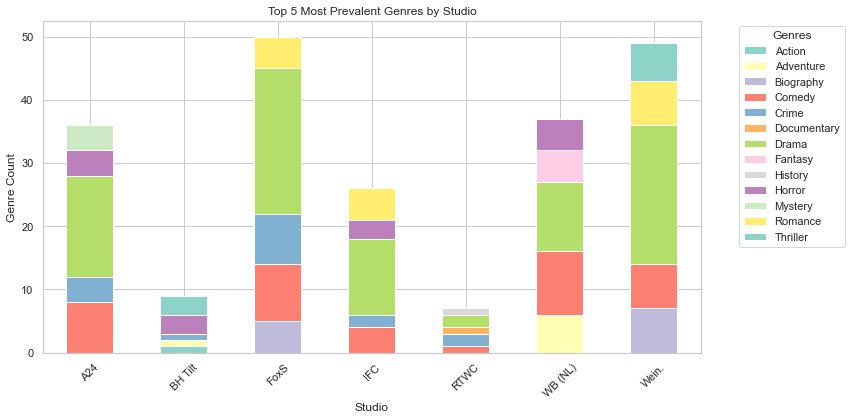

In [41]:
data = genre_counts

df = pd.DataFrame(data)

# Sort the data by genre count within each studio
df_sorted = df.sort_values(by=['studio', 'genre_count'], ascending=[True, False])

# Get the top 5 genres for each studio
top5_genres = df_sorted.groupby('studio').head(5)

# Pivot the DataFrame for plotting
pivot_table = top5_genres.pivot(index='studio', columns='genres', values='genre_count').fillna(0)

unique_genres = top5_genres['genres'].unique()
palette = sns.color_palette("Set3", len(unique_genres))

# Create the bar plot using the custom palette
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=palette)

# Customize the plot
plt.xlabel('Studio')
plt.ylabel('Genre Count')
plt.title('Top 5 Most Prevalent Genres by Studio')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
q3 = ''' 
SELECT
    title,
    studio,
    runtime_minutes,
    averagerating
FROM
    full_movies
WHERE
    studio IN ('IFC', 'RTWC', 'A24', 'BH Tilt', 'Wein.', 'FoxS', 'WB (NL)')
GROUP BY title
ORDER BY
    studio;
'''

studio_runtime = pysqldf(q3)
studio_runtime

,title,studio,runtime_minutes,averagerating
0,A-GHOST-STORY,A24,92.0,6.8
1,A-MOST-VIOLENT-YEAR,A24,125.0,7.0
2,AMERICAN-HONEY,A24,163.0,7.0
3,EX-MACHINA,A24,108.0,7.7
4,FREE-FIRE,A24,91.0,6.4
...,...,...,...,...
163,THE-MASTER,Wein.,138.0,7.1
164,THE-RAILWAY-MAN,Wein.,116.0,7.1
165,THE-SAPPHIRES,Wein.,103.0,7.0
166,TULIP-FEVER,Wein.,105.0,6.2


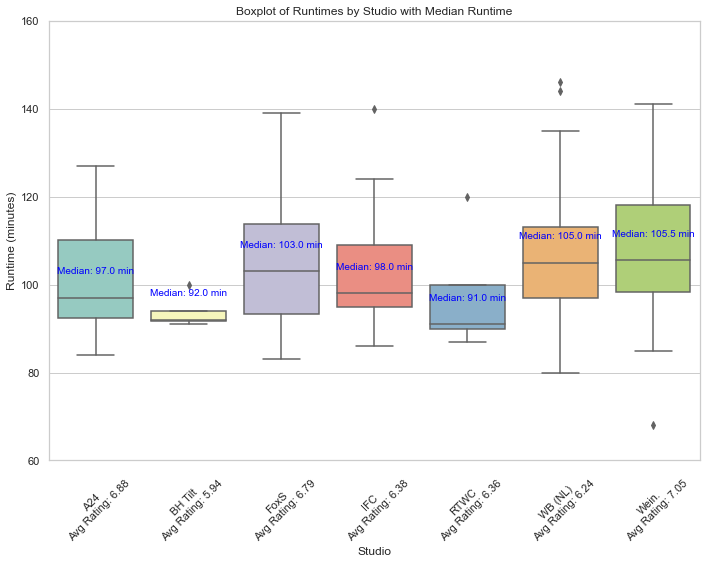

In [43]:
data = studio_runtime

df = pd.DataFrame(data)

# Calculate the median runtime for each studio
median_runtimes = df.groupby('studio')['runtime_minutes'].median().reset_index()

# Calculate the average of the averagerating column for each studio
average_ratings = df.groupby('studio')['averagerating'].mean().reset_index()

# Create a dictionary to map studio names to average ratings
studio_rating_dict = dict(zip(average_ratings['studio'], average_ratings['averagerating']))

# Create a boxplot with seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='studio', y='runtime_minutes', palette='Set3')

# Mark the median runtime for each studio on the plot
for index, row in median_runtimes.iterrows():
    studio = row['studio']
    median_runtime = row['runtime_minutes']
    plt.text(index, median_runtime + 5, f'Median: {median_runtime} min', ha='center', va='bottom', fontsize=10, color='blue')

# Customize the plot
plt.title('Boxplot of Runtimes by Studio with Median Runtime')
plt.xlabel('Studio')
plt.ylabel('Runtime (minutes)')
plt.xticks(rotation=45)

# Shorten the y-axis to the range 60 to 160
plt.ylim(60, 160)

# Add average rating labels next to studio tickmarks
ax = plt.gca()
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    studio_name = label.get_text()
    if studio_name in studio_rating_dict:
        avg_rating = studio_rating_dict[studio_name]
        label.set_text(f'{studio_name}\nAvg Rating: {avg_rating:.2f}')
    else:
        label.set_text(studio_name)
ax.set_xticklabels(xtick_labels)

# Show the plot
plt.tight_layout()
plt.show()